Packages

In [60]:
from os import listdir
import matplotlib.pyplot as plt
from imutils import paths
import cv2
import numpy as np
import os
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

Data preparation

In [7]:
# Look at data folder structure
classes_dir = listdir("data/Kather_texture_2016_image_tiles_5000")
classes_dir

['.DS_Store',
 '01_TUMOR',
 '02_STROMA',
 '03_COMPLEX',
 '04_LYMPHO',
 '05_DEBRIS',
 '06_MUCOSA',
 '07_ADIPOSE',
 '08_EMPTY']

In [8]:
# Check files
files = listdir("data/Kather_texture_2016_image_tiles_5000/01_TUMOR")
for n in range(5):
    print(files[n])

10009_CRC-Prim-HE-03_009.tif_Row_301_Col_151.tif
10062_CRC-Prim-HE-02_003b.tif_Row_1_Col_301.tif
100B0_CRC-Prim-HE-09_009.tif_Row_1_Col_301.tif
10104_CRC-Prim-HE-10_021.tif_Row_451_Col_1.tif
10142_CRC-Prim-HE-09_025.tif_Row_151_Col_151.tif


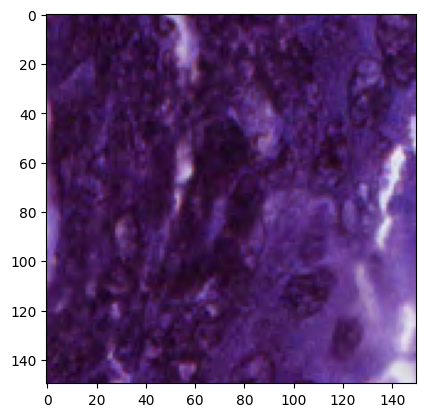

In [20]:
# visualize example image
file = cv2.imread("data/Kather_texture_2016_image_tiles_5000/01_TUMOR/1A11_CRC-Prim-HE-07_022.tif_Row_601_Col_151.tif")
# file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB)
# file = cv2.resize(file, (128, 128))
plt.imshow(file)

In [115]:
# Load data
print("[INFO] loading images...")
imagePaths = list(paths.list_images("data/Kather_texture_2016_image_tiles_5000"))
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]
    # Since we are going to use MobileNetV2 we need to resize the images
    # to the expected size by the pre-trained network.
    image = load_img(imagePath, target_size=(150, 150))
    image = img_to_array(image)
    # image = preprocess_input(image)
    image = image / 255
    data.append(image)
    labels.append(label)

[INFO] loading images...


In [84]:
data.shape

(5000, 150, 150, 3)

In [64]:
data[0].shape

(150, 150, 3)

In [48]:
print(labels[10], labels[2500], labels[4500])

01_TUMOR 05_DEBRIS 08_EMPTY


In [85]:
data[0]

array([[[-0.00139608, -0.00312157, -0.00133333],
        [-0.00083137, -0.00293333, -0.00130196],
        [-0.00083137, -0.00293333, -0.00130196],
        ...,
        [-0.00152157, -0.00327843, -0.00186667],
        [-0.00167843, -0.00343529, -0.00202353],
        [-0.00208627, -0.00340392, -0.00214902]],

       [[-0.00167843, -0.00305882, -0.00152157],
        [-0.0011451 , -0.00296471, -0.00142745],
        [-0.00120784, -0.00302745, -0.0014902 ],
        ...,
        [-0.00098824, -0.00293333, -0.00145882],
        [-0.00142745, -0.00337255, -0.00189804],
        [-0.00218039, -0.00349804, -0.00224314]],

       [[-0.00180392, -0.00290196, -0.00164706],
        [-0.00167843, -0.00299608, -0.00174118],
        [-0.00180392, -0.00312157, -0.00186667],
        ...,
        [-0.00039216, -0.00252549, -0.00098824],
        [-0.00095686, -0.0030902 , -0.00155294],
        [-0.00196078, -0.00337255, -0.00208627]],

       ...,

       [[-0.00189804, -0.00334118, -0.00218039],
        [-0

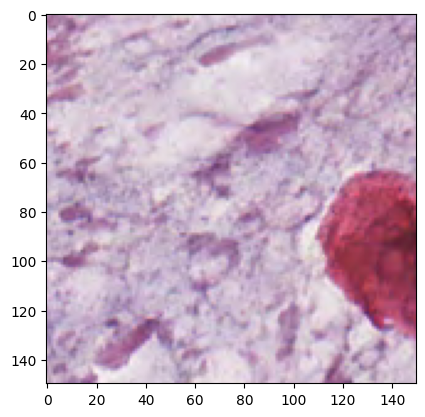

In [98]:
plt.imshow(data[2500])

In [73]:
# nsamples, nx, ny = data.shape[1::]
# data = data.+reshape((nsamples,nx*ny))

ValueError: cannot reshape array of size 337500000 into shape (150,450)

In [113]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels[0]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [116]:
# Split of data into train and test
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [117]:
trainY

['07_ADIPOSE',
 '07_ADIPOSE',
 '06_MUCOSA',
 '01_TUMOR',
 '05_DEBRIS',
 '03_COMPLEX',
 '03_COMPLEX',
 '02_STROMA',
 '03_COMPLEX',
 '01_TUMOR',
 '04_LYMPHO',
 '06_MUCOSA',
 '02_STROMA',
 '06_MUCOSA',
 '07_ADIPOSE',
 '06_MUCOSA',
 '05_DEBRIS',
 '06_MUCOSA',
 '03_COMPLEX',
 '08_EMPTY',
 '05_DEBRIS',
 '07_ADIPOSE',
 '03_COMPLEX',
 '08_EMPTY',
 '04_LYMPHO',
 '01_TUMOR',
 '08_EMPTY',
 '01_TUMOR',
 '06_MUCOSA',
 '05_DEBRIS',
 '08_EMPTY',
 '01_TUMOR',
 '03_COMPLEX',
 '05_DEBRIS',
 '03_COMPLEX',
 '08_EMPTY',
 '05_DEBRIS',
 '01_TUMOR',
 '02_STROMA',
 '03_COMPLEX',
 '07_ADIPOSE',
 '01_TUMOR',
 '05_DEBRIS',
 '02_STROMA',
 '04_LYMPHO',
 '02_STROMA',
 '03_COMPLEX',
 '02_STROMA',
 '03_COMPLEX',
 '06_MUCOSA',
 '05_DEBRIS',
 '04_LYMPHO',
 '07_ADIPOSE',
 '03_COMPLEX',
 '08_EMPTY',
 '07_ADIPOSE',
 '02_STROMA',
 '07_ADIPOSE',
 '03_COMPLEX',
 '07_ADIPOSE',
 '08_EMPTY',
 '07_ADIPOSE',
 '03_COMPLEX',
 '06_MUCOSA',
 '08_EMPTY',
 '02_STROMA',
 '08_EMPTY',
 '02_STROMA',
 '04_LYMPHO',
 '07_ADIPOSE',
 '04_LYMPHO'